# Modularity
## Modularity formula

Modularity is a quantitative metric used to evaluate the strength of a network's division into modules (or communities). It measures how well the network is partitioned by comparing the density of edges within communities to the expected density of such edges in a randomized network that preserves the original degree distribution. The formula for modularity is given below.

$$Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \gamma \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$$

Where:
* $m$: Total number of edges in the graph (sum of all edge weights for a weighted graph).
* $A_{ij}$: Element of the adjacency matrix, representing the weight of the edge between node $i$ and node $j$ (0 if no edge).
* $k_i$: Degree of node $i$ (sum of weights of edges connected to node $i$).
* $k_j$: Degree of node $j$.
* $\gamma$ is the resolution parameter. The default value is 1.0.
* $\delta(c_i, c_j)$: Kronecker delta function, which is 1 if node $i$ and node $j$ belong to the same community ($c_i = c_j$), and 0 otherwise.

### Example graph

Let's use a simple graph with two 3-node cliques connected by a single edge. This graph has a clear, intuitive community structure.

* **Nodes (V):** $\{1, 2, 3, 4, 5, 6\}$
* **Edges (E):**
    * Clique 1: $(1, 2), (1, 3), (2, 3)$
    * Clique 2: $(4, 5), (4, 6), (5, 6)$
    * Connecting edge: $(3, 4)$
* **Total Edges** ($m$): $m = 7$
* **Node Degrees** ($k_i$):
    * Nodes 1, 2, 5, 6: $k_i = 2$
    * Nodes 3, 4: $k_i = 3$

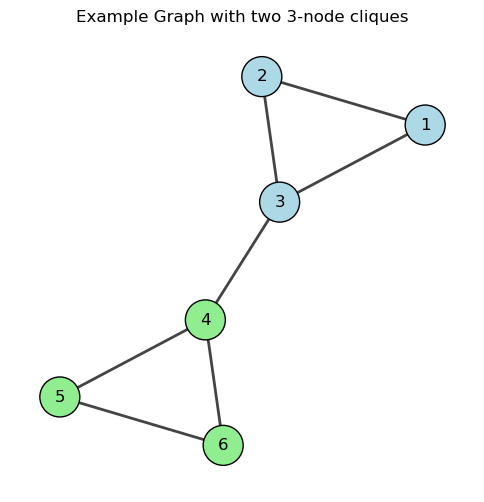

In [1]:
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5)])

fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=40,
    vertex_color=['lightblue'] * 3 + ['lightgreen'] * 3,
    vertex_label=[f'{i+1}' for i in range(6)],
    layout='kamada_kawai'
)
ax.set_title("Example Graph with two 3-node cliques")
plt.show()

### Partitioning the graph

We will now evaluate two different partitions to see how modularity scores differ.

#### "Good" partitioning ($P_{good}$)

This partition correctly identifies the two cliques.

* **Community 1:** $C_1 = \{1, 2, 3\}$
* **Community 2:** $C_2 = \{4, 5, 6\}$

#### "Bad" partitioning ($P_{bad}$)

This partition incorrectly splits a clique and merges nodes from both communities.

* **Community 1:** $C_1 = \{1, 2, 4\}$
* **Community 2:** $C_2 = \{3, 5, 6\}$

#### Adjacency matrix ($A_{ij}$)

The adjacency matrix for this graph is:


In [2]:
print(g.get_adjacency())

[[0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [1, 1, 0, 1, 0, 0]
 [0, 0, 1, 0, 1, 1]
 [0, 0, 0, 1, 0, 1]
 [0, 0, 0, 1, 1, 0]]


### Modularity calculation
### Computation for "good" partitioning ($P_\text{good}$)

This partition correctly identifies the two cliques.

* **Community 1** ($C_1$): $\{1, 2, 3\}$
* **Community 2** ($C_2$): $\{4, 5, 6\}$

The calculation is split into two sums, one for each community.

#### Sum for community 1 ($C_1 = \{1, 2, 3\}$):

* $\sum_{i,j \in C_1} A_{ij}$: There are 3 edges within this community, $(1, 2)$, $(1, 3)$, and $(2, 3)$. The sum over all ordered pairs is $2 \times 3 = 6$.
* $\sum_{i,j \in C_1} \frac{k_i k_j}{2m} = \frac{k_1 k_1}{14} + \frac{k_1 k_2}{14} + \frac{k_1 k_3}{14} + \frac{k_2 k_1}{14} + \frac{k_2 k_2}{14} + \frac{k_2 k_3}{14} + \frac{k_3 k_1}{14} + \frac{k_3 k_2}{14} + \frac{k_3 k_3}{14}$
$= \frac{(2)(2)+(2)(2)+(2)(3)+(2)(2)+(2)(2)+(2)(3)+(3)(2)+(3)(2)+(3)(3)}{14}$
$= \frac{4+4+6+4+4+6+6+6+9}{14} = \frac{49}{14} = 3.5$
* **Sum for** $C_1$: $6 - 3.5 = 2.5$.

#### Sum for community 2 ($C_2 = \{4, 5, 6\}$):

* The calculation is identical to Community 1, as it has the same internal edge structure and node degrees.
* **Sum for** $C_2$: $6 - 3.5 = 2.5$.

**Total sum:**
$\sum_{i,j} \left[A_{ij} - \frac{k_i k_j}{2m}\right] \delta(c_i, c_j) = (\text{Sum for } C_1) + (\text{Sum for } C_2) = 2.5 + 2.5 = 5$.

**Final modularity** ($Q_{good}$):
$Q_{good} = \frac{1}{2m} \times (\text{Total Sum}) = \frac{1}{14} \times 5 = \frac{5}{14} \approx \mathbf{0.357}$



In [3]:
membership_good = [0, 0, 0, 1, 1, 1]
g.modularity(membership_good)

0.3571428571428571


### Computation for "bad" partitioning ($P_\text{bad}$)

This partition incorrectly splits a clique and merges nodes from both communities.

* **Community 1** ($C_1$): $\{1, 2, 4\}$
* **Community 2** ($C_2$): $\{3, 5, 6\}$

#### Sum for community 1 ($C_1 = \{1, 2, 4\}$):

* $\sum_{i,j \in C_1} A_{ij}$: There is only one edge, $(1, 2)$, so the sum over ordered pairs is $2 \times 1 = 2$.
* $\sum_{i,j \in C_1} \frac{k_i k_j}{2m}$:
    * The node degrees are $k_1 = 2$, $k_2 = 2$, $k_4 = 3$.
    * The sum is $\frac{(2)(2)+(2)(2)+(2)(3)+(2)(2)+(2)(2)+(2)(3)+(3)(2)+(3)(2)+(3)(3)}{14} = \frac{49}{14} = 3.5$.
* **Sum for** $C_1$: $2 - 3.5 = -1.5$.

#### Sum for community 2 ($C_2 = \{3, 5, 6\}$):

* $\sum_{i,j \in C_2} A_{ij}$: There is only one edge, $(5, 6)$, so the sum over ordered pairs is $2 \times 1 = 2$.
* $\sum_{i,j \in C_2} \frac{k_i k_j}{2m}$:
    * The node degrees are $k_3 = 3$, $k_5 = 2$, $k_6 = 2$.
    * The sum is $\frac{(3)(3)+(3)(2)+(3)(2)+(2)(3)+(2)(2)+(2)(2)+(2)(3)+(2)(2)+(2)(2)}{14} = \frac{49}{14} = 3.5$.
* **Sum for** $C_2$: $2 - 3.5 = -1.5$.

**Total sum:**
$\sum_{i,j} \left[A_{ij} - \frac{k_i k_j}{2m}\right] \delta(c_i, c_j) = (\text{Sum for } C_1) + (\text{Sum for } C_2) = -1.5 + (-1.5) = -3$.

**Final modularity** ($Q_{bad}$):
$Q_{bad} = \frac{1}{2m} \times (\text{Total Sum}) = \frac{1}{14} \times (-3) = -\frac{3}{14} \approx \mathbf{-0.214}$

In [4]:
membership_bad = [0, 0, 1, 0, 1, 1]
g.modularity(membership_bad)

-0.2142857142857143

*Note:* Based on our previous analysis, the "good" partitioning yields a significantly higher modularity score. It is important to note, however, that a high modularity score is not always a definitive indicator of a better community partitioning, as was previously demonstrated with the Grid Graph [here](test_significance_of_community.ipynb).

## Directed modularity

While the classic modularity formula works for undirected networks, a different approach is needed for **directed networks**, where edges have a specific direction (e.g., from node *i* to node *j*). In this context, the direction of an edge is crucial and should not be ignored.

The directed modularity formula is:

$$Q = \frac{1}{m} \sum_{i,j} \left[ A_{ij} -  \gamma \frac{k_i^\text{out} k_j^\text{in}}{m} \right] \delta(c_i, c_j)$$

Where:
* $m$: Total number of directed edges in the graph.
* $A_{ij}$: Element of the adjacency matrix, representing the weight of the edge from node $i$ to node $j$.
* $k_{i}^{out}$: The **out-degree** of node $i$ (the sum of weights of edges leaving node *i*).
* $k_{j}^{in}$: The **in-degree** of node $j$ (the sum of weights of edges entering node *j*).
* $\gamma$ is the resolution parameter. The default value is 1.0.
* $\delta(c_i, c_j)$: Kronecker delta function, which is 1 if node $i$ and node $j$ belong to the same community ($c_i = c_j$), and 0 otherwise.

### Why does the direction of edges matter?
* **Flipping a single edge:** Reversing a single edge (e.g., from A → B to B → A) will change the modularity score. This is because the out-degree of A and the in-degree of B would change, altering the null model's calculation and, consequently, the overall score.
* **Flipping all edges:** If you reverse the direction of **every single edge** in the network, the modularity score will **remain the same**. This is due to a symmetry property of the formula. The set of in-degrees becomes the new set of out-degrees, and vice versa. When the formula is applied to this completely reversed network, the total modularity score is unchanged. This is a fascinating property of directed modularity.

## From directed to undirected formula
Start with the directed formula:

$$Q = \frac{1}{m} \sum_{i,j} \left[ A_{ij} - \gamma \frac{k_i^\text{out} k_j^\text{in}}{m} \right] \delta(c_i, c_j)$$

Substitute $(k_i^\text{out} = k_i)$ and $(k_j^\text{in} = k_j)$:

$$Q = \frac{1}{m} \sum_{i,j} \left[ A_{ij} - \gamma \frac{k_i k_j}{m} \right] \delta(c_i, c_j)$$

However, this sum is **over ordered pairs** \((i,j)\), so each undirected edge is **counted twice**.  
To avoid double counting, we divide by $2$:


$$Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \gamma \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$$

This matches the undirected formula exactly.



## Why the resolution parameter is important

The resolution parameter addresses a fundamental limitation of the original modularity measure, known as the **"resolution limit"**. This is the tendency of the original formula (where $\gamma=1$) to fail at detecting small communities, especially in large graphs. It often merges smaller, distinct communities into a single larger one to maximize the modularity score.

By adjusting the value of $\gamma$, you can control the granularity of the community detection:

* $\gamma > 1$: Increasing the resolution parameter penalizes connections more heavily. This encourages the algorithm to find **fewer and larger communities**, as it becomes harder for smaller, highly connected groups to form their own separate communities.
* $\gamma < 1$: Decreasing the resolution parameter reduces the penalty. This allows the algorithm to find **more and smaller communities**, as it becomes easier for closely-knit groups to be identified as their own communities.

In essence, the resolution parameter provides a flexible way to explore the community structure of a network at different scales, moving beyond the limitations of a single, fixed-scale partition.

## Density-based modularity for undirected graphs

While modularity is a powerful metric, it suffers from a well-known flaw called the **resolution limit**. This problem causes the modularity-maximizing algorithm to fail to detect small, tightly-knit communities, especially in large networks. Instead of finding these small groups, it often merges them into a single larger one to maximize the modularity score.

One alternative is to use a variant based on an **Erdős-Rényi null model**, sometimes called **density-based modularity**. Instead of comparing communities to a degree-preserving random graph (configuration model), it compares them to a uniform random graph with the same overall density.

For a graph \( G = (V, E) \) with \( n = |V| \) nodes and \( m = |E| \) edges, the global **edge density** is

$$p = \frac{2m}{n(n-1)}$$


The **density-based modualrity** is defined as:


$$Q_{\text{density}} = \frac{1}{2m} \sum_{i,j} 
\Big( A_{ij} - p \Big) \, \delta(c_i, c_j),$$


where:

* $n$: Total number of nodes in the graph.
* $m$: Total number of edges in the graph.
* $A_{ij}$: Element of the adjacency matrix, representing the weight of the edge from node $i$ to node $j$.
* $p$: expected probability of an edge.
* $\delta(c_i, c_j)$: Kronecker delta function, which is 1 if node $i$ and node $j$ belong to the same community ($c_i = c_j$), and 0 otherwise.  

In this formulation, the null model assumes **uniform edge probability**, so communities are favored if their **internal density** is higher than the global density.
